## Basics of Image Processing using OpenCV

In [24]:
# Import Necessary Libraries 
import pandas as pd 
import numpy as np 

import cv2 
import matplotlib.pylab as plt 
%matplotlib inline

### Reading Images

In [25]:
# Import and read an image using matplotlib 
img_matplot = plt.imread('sample_img.jpg') 

# Import and read an image using opencv
img_cv2 = cv2.imread('sample_img.jpg')

# View image dimensions in both matplotlib and opencv 
img_matplot.shape, img_cv2.shape

((224, 225, 3), (224, 225, 3))

In [26]:
# View the image array 
img_matplot

array([[[246, 234, 220],
        [245, 233, 219],
        [245, 233, 219],
        ...,
        [228, 219, 188],
        [226, 216, 189],
        [229, 221, 200]],

       [[246, 234, 220],
        [245, 233, 219],
        [244, 232, 218],
        ...,
        [230, 221, 192],
        [229, 219, 192],
        [231, 223, 204]],

       [[243, 233, 221],
        [242, 232, 220],
        [242, 232, 220],
        ...,
        [234, 224, 199],
        [234, 223, 201],
        [234, 226, 207]],

       ...,

       [[127, 110,  92],
        [ 91,  74,  56],
        [ 91,  74,  58],
        ...,
        [ 21,  21,  21],
        [ 11,  11,  11],
        [ 14,  14,  16]],

       [[133, 116, 100],
        [102,  85,  69],
        [110,  93,  77],
        ...,
        [ 21,  21,  21],
        [ 13,  13,  13],
        [ 14,  14,  16]],

       [[101,  84,  68],
        [ 92,  75,  59],
        [132, 115,  99],
        ...,
        [ 17,  17,  17],
        [ 12,  12,  12],
        [ 10,  10,  12]]

### Understanding Image Dimensions

We can think of images being composed of small boxes known as *pixels*. The *image array* essentially consists of 3 values : `(height, width, channels)`. Each value of an image array represents the *intensity* of the pixel. The *intensity* of a pixel ranges from `0` to `255`, where `0` represents black and `255` represents white. Each pixel uniquely contributes to an image. 

Here is an illustration on what the image array represents:

![Image_Array](https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png)

In [27]:
# View maxiumum pixel intensity of the image 
img_matplot.max()

255

### Displaying Images using Matplotlib

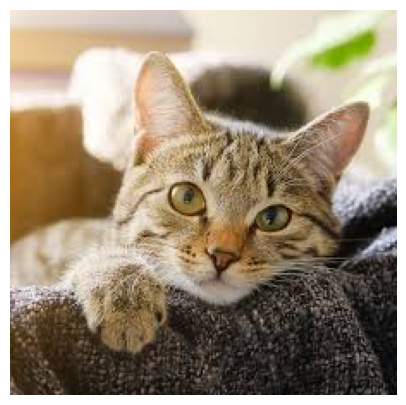

In [28]:
# Display an image using matplotlib 
fig, ax = plt.subplots(figsize=(5, 5))

# Remove axis 
ax.axis('off')

# Display image
ax.imshow(img_matplot)
plt.show()

### Image Channels 

Images are loaded into Matplotlib and OpenCV using the RGB Representation. The RGB representation consists of 3 channels : Red - Green - Blue. Combinations of these channels represent all the colors that the human eye can perceive. 

RGB Channels visualized using Numpy arrays: 

![RGB_Channels](https://media.geeksforgeeks.org/wp-content/uploads/20230329095332/RGB-arrays-combined-to-make-image.jpg)



In [29]:
# The "shape" of an image shows its height, width and number of channels 
img_matplot.shape

(224, 225, 3)

Text(0.5, 1.0, 'Blue Channel')

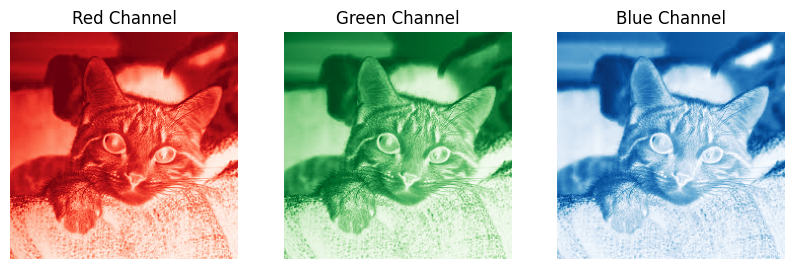

In [30]:
# Split the image into its RGB channel components
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(img_matplot[:,:,0], cmap='Reds')   # Red channel
axs[1].imshow(img_matplot[:,:,1], cmap='Greens') # Green channel
axs[2].imshow(img_matplot[:,:,2], cmap='Blues')  # Blue channel

# Remove the axis 
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

# Set titles 
axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')

The key difference between images in OpenCV versus those in Matplotlib is that `cv2` reads in the channels in BGR format, whereas `matplotlib` reads in channels in RGB format. This is visualized below.

Text(0.5, 1.0, 'matplotlib Image')

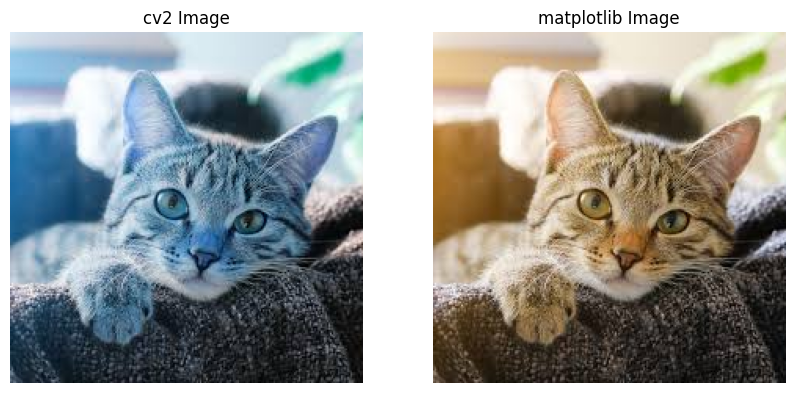

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Display the images read by cv2 and matplotlib 
axs[0].imshow(img_cv2)
axs[1].imshow(img_matplot)

# Remove the axis 
axs[0].axis('off')
axs[1].axis('off')

# Set titles 
axs[0].set_title('cv2 Image')
axs[1].set_title('matplotlib Image')

In [33]:
# Convert cv2 image from BGR to RGB format
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'cv2 Image (RGB)')

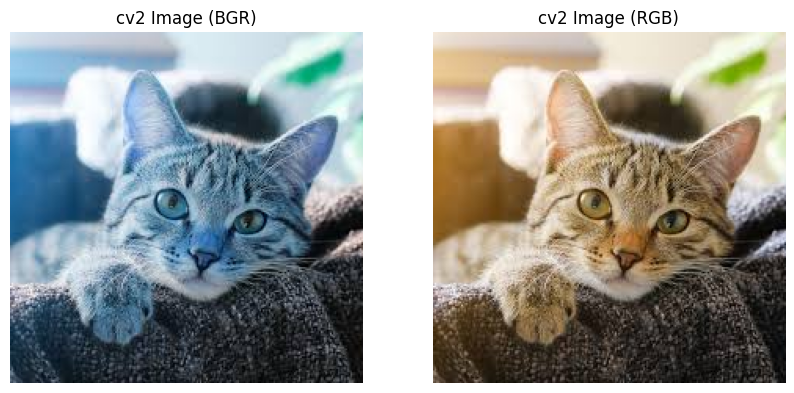

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Display the images read by cv2 and matplotlib 
axs[0].imshow(img_cv2)
axs[1].imshow(img_cv2_rgb)

# Remove the axis 
axs[0].axis('off')
axs[1].axis('off')

# Set titles 
axs[0].set_title('cv2 Image (BGR)')
axs[1].set_title('cv2 Image (RGB)')

### Image Manipulation

#### Grayscale Images 

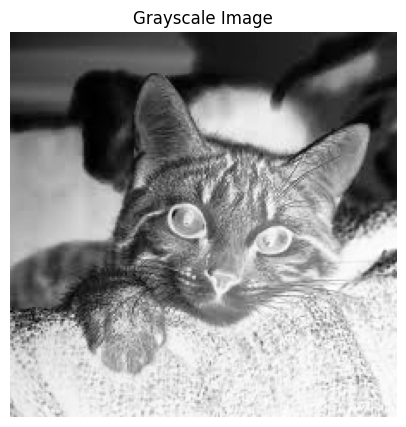

In [42]:
img_gray = cv2.cvtColor(img_cv2_rgb, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grayscale Image')

plt.show()

In [41]:
img_gray.shape

(224, 225)

Notice how there is no third dimension here. This is because in grayscale images, the channels collapse to a single grayscale format. Pixel intensities from `0` to `255` now represent greys. 

#### Resizing and Scaling

##### Scaling the `x` and `y` axis by certain percentages

Text(0.5, 1.0, 'cv2 Image (Resized)')

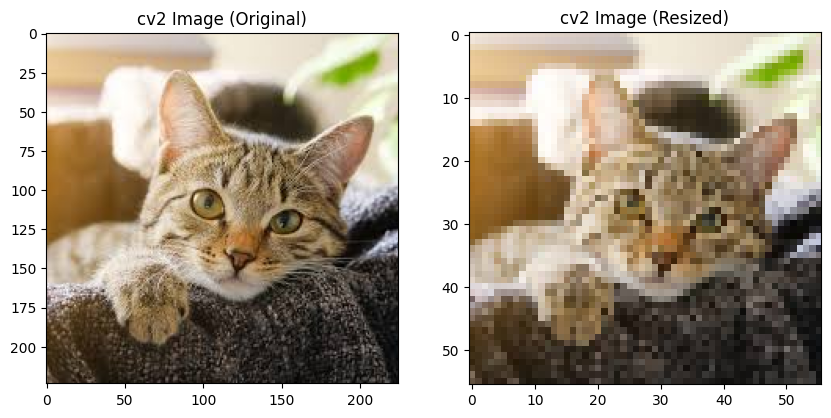

In [45]:
# Reduce the image to 25% of its original size 
img_resized = cv2.resize(img_cv2_rgb, None, fx=0.25, fy=0.25)

# Display the original and resized images
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img_cv2_rgb)
axs[1].imshow(img_resized)

axs[0].set_title('cv2 Image (Original)')
axs[1].set_title('cv2 Image (Resized)')

In [46]:
# Dimensions
print('Original Dimensions: ', img_cv2_rgb.shape)
print('New Dimensions: ', img_resized.shape)

Original Dimensions:  (224, 225, 3)
New Dimensions:  (56, 56, 3)


##### Resizing the image by specifying new pixel dimensions

Text(0.5, 1.0, 'cv2 Image (Resized)')

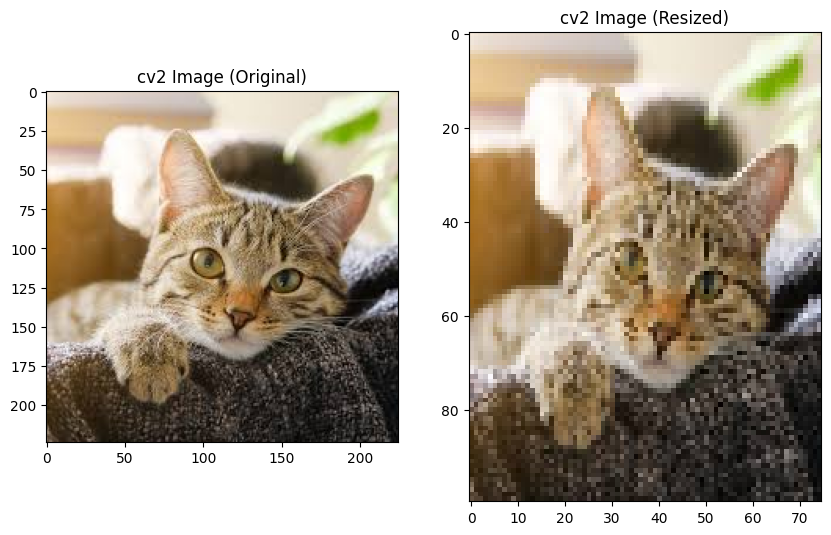

In [47]:
# Reduce the image to 25% of its original size 
img_resized = cv2.resize(img_cv2_rgb, (75, 100))

# Display the original and resized images
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img_cv2_rgb)
axs[1].imshow(img_resized)

axs[0].set_title('cv2 Image (Original)')
axs[1].set_title('cv2 Image (Resized)')

### Additional Resources 

[1] Beginner's Guide to Image Processing : https://www.analyticsvidhya.com/blog/2021/09/a-beginners-guide-to-image-processing-with-opencv-and-python/

[2] OpenCV Course : https://www.youtube.com/watch?v=oXlwWbU8l2o

[3] Image Processing with OpenCV and Python : https://www.youtube.com/watch?v=kSqxn6zGE0c